<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Khai báo và sử dụng các thư viện sau
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [40]:
# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Di chuyển tới thư mục VNMoney
%cd /content/drive/MyDrive/Face Shape

/content/drive/MyDrive/Face Shape


In [42]:
# Khởi tạo dữ liệu cho quá trình training
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Face Shape/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Face Shape/valid',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 348 images belonging to 5 classes.
Found 152 images belonging to 5 classes.


In [43]:
# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}

In [44]:
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices


{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}

In [45]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [46]:
# Biên dịch 
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
# Tiến hành quá trình training
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)

Epoch 1/30
11/11 [==============================] - 7s 427ms/step - loss: 7.0420 - accuracy: 0.1753 - val_loss: 1.6154 - val_accuracy: 0.1579
Epoch 2/30
11/11 [==============================] - 8s 739ms/step - loss: 1.6104 - accuracy: 0.2356 - val_loss: 1.6336 - val_accuracy: 0.1447
Epoch 3/30
11/11 [==============================] - 5s 491ms/step - loss: 1.6037 - accuracy: 0.2500 - val_loss: 1.6634 - val_accuracy: 0.1579
Epoch 4/30
11/11 [==============================] - 4s 380ms/step - loss: 1.6096 - accuracy: 0.2471 - val_loss: 1.6417 - val_accuracy: 0.1250
Epoch 5/30
11/11 [==============================] - 4s 379ms/step - loss: 1.5909 - accuracy: 0.2414 - val_loss: 1.6564 - val_accuracy: 0.1382
Epoch 6/30
11/11 [==============================] - 5s 494ms/step - loss: 1.5648 - accuracy: 0.2672 - val_loss: 1.6793 - val_accuracy: 0.1316
Epoch 7/30
11/11 [==============================] - 4s 380ms/step - loss: 1.5126 - accuracy: 0.3448 - val_loss: 1.7191 - val_accuracy: 0.1447
Epoch 

In [47]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.5378594994544983
Train Accuracy 0.8074712753295898


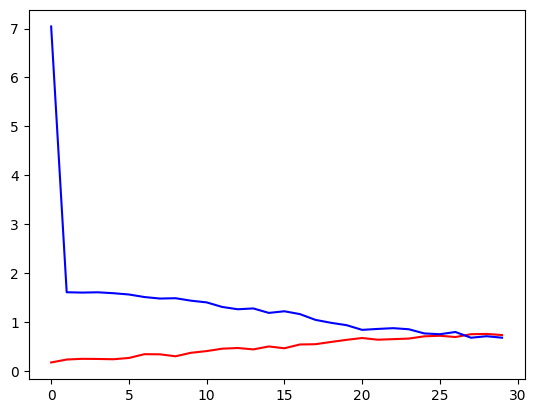

In [48]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()

In [49]:
# Lưu 
from google.colab import drive
model.save('drive/MyDrive/FaceDefine.h5')

In [50]:
# Load model vừa lưu
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Face Shape/drive/MyDrive/FaceDefine.h5')

1/1 [==============================] - 0s 23ms/step
square
1/1 [==============================] - 0s 22ms/step
oval
1/1 [==============================] - 0s 22ms/step
oblong
1/1 [==============================] - 0s 21ms/step
round
1/1 [==============================] - 0s 20ms/step
oval
1/1 [==============================] - 0s 18ms/step
oblong
1/1 [==============================] - 0s 20ms/step
heart
1/1 [==============================] - 0s 19ms/step
round
1/1 [==============================] - 0s 20ms/step
round
1/1 [==============================] - 0s 18ms/step
square


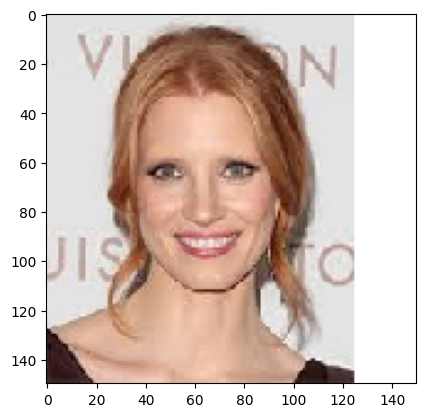

In [52]:
# Chạy thử kết quả
test="/content/drive/MyDrive/Face Shape/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['heart','oblong','oval','round','square']
  print(class_name[result])
  
plt.show()

